### XGBOOST Implementation on Matches dataset

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [36]:
df=pd.read_csv("matches_08-19.csv")
df.head()

,team A,team B,Toss_Winner,Top Batsmen Points(Team A),Top Batsmen Points(Team B),Top Baller Points(Team A),Top Baller Points(Team B),Match Won after winning Toss Team A,Match Won after winning Toss Team B,runs in pp team a,...,result,toss_decision,dl_applied,win_by_runs,win_by_wickets,player_of_match,umpire1,umpire2,umpire3,venue
0,KKR,RCB,RCB,536,509,730,393,0.0,0.0,61,...,normal,field,0,140,0,BB McCullum,Asad Rauf,RE Koertzen,NaN,M Chinnaswamy Stadium
1,CSK,KXIP,CSK,807,804,564,538,0.0,0.0,53,...,normal,bat,0,33,0,MEK Hussey,MR Benson,SL Shastri,NaN,"Punjab Cricket Association Stadium, Mohali"
2,RR,DC,RR,642,536,571,590,0.0,0.0,40,...,normal,bat,0,0,9,MF Maharoof,Aleem Dar,GA Pratapkumar,NaN,Feroz Shah Kotla
3,MI,RCB,MI,556,509,970,393,0.0,0.0,47,...,normal,bat,0,0,5,MV Boucher,SJ Davis,DJ Harper,NaN,Wankhede Stadium
4,DEC,KKR,DEC,617,536,603,730,0.0,0.0,39,...,normal,bat,0,0,5,DJ Hussey,BF Bowden,K Hariharan,NaN,Eden Gardens


In [37]:
df1=df.drop(columns=["id","result","toss_decision","dl_applied","win_by_runs","win_by_wickets","player_of_match","umpire1","umpire2","umpire3","venue"])
df1.head()

,team A,team B,Toss_Winner,Top Batsmen Points(Team A),Top Batsmen Points(Team B),Top Baller Points(Team A),Top Baller Points(Team B),Match Won after winning Toss Team A,Match Won after winning Toss Team B,runs in pp team a,runs in pp team b,Run Rate(Team A),Run Rate(Team B),Most Value Player Points(Team A),Most Value Player Points(Team B),Win ratio (Team A),Win ratio (Team B),Team A Ground,Team B Ground,winner
0,KKR,RCB,RCB,536,509,730,393,0.0,0.0,61,26,-0.147,-1.160,514.5,517.5,0.0,0.0,away,home,KKR
1,CSK,KXIP,CSK,807,804,564,538,0.0,0.0,53,63,-0.192,0.509,680.0,727.0,0.0,0.0,away,away,CSK
2,RR,DC,RR,642,536,571,590,0.0,0.0,40,55,0.632,0.342,917.0,517.5,0.0,0.0,away,away,DC
3,MI,RCB,MI,556,509,970,393,0.0,0.0,47,40,0.570,-1.160,724.0,517.5,0.0,0.0,home,away,RCB
4,DEC,KKR,DEC,617,536,603,730,0.0,0.0,39,26,-0.467,-0.147,598.0,514.5,0.0,0.0,away,home,KKR


In [38]:
#Renaming

df2 = df1.rename(columns = {'team A': 'team_A',
                              'team B': 'team_B',
                              'Toss_Winner': 'toss_winner',
                              'Top Batsmen Points(Team A)': 'top_batsmen_points_A',
                              'Top Batsmen Points(Team B)': 'top_batsmen_points_B',
                              'Top Baller Points(Team A)': 'top_baller_points_A',
                              'Top Baller Points(Team B)': 'top_baller_points_B',
                              'Match Won after winning Toss Team A': 'match_won_after_winning_toss_A',
                              'Match Won after winning Toss Team B': 'match_won_after_winning_toss_B',
                              'runs in pp team a': 'runs_in_powerplay_A',
                              'runs in pp team b': 'runs_in_powerplay_B',
                              'Run Rate(Team A)': 'run_rate_A',
                              'Run Rate(Team B)': 'run_rate_B',
                              'Most Value Player Points(Team A)': 'most_value_player_points_A',
                              'Most Value Player Points(Team B)': 'most_value_player_points_B',
                              'Win ratio (Team A)': 'win_ratio_A',
                              'Win ratio (Team B)': 'win_ratio_B',
                              'Team A Ground': 'ground_A',
                              'Team B Ground': 'ground_B',
                             }, inplace = False)
df2.head()

,team_A,team_B,toss_winner,top_batsmen_points_A,top_batsmen_points_B,top_baller_points_A,top_baller_points_B,match_won_after_winning_toss_A,match_won_after_winning_toss_B,runs_in_powerplay_A,runs_in_powerplay_B,run_rate_A,run_rate_B,most_value_player_points_A,most_value_player_points_B,win_ratio_A,win_ratio_B,ground_A,ground_B,winner
0,KKR,RCB,RCB,536,509,730,393,0.0,0.0,61,26,-0.147,-1.160,514.5,517.5,0.0,0.0,away,home,KKR
1,CSK,KXIP,CSK,807,804,564,538,0.0,0.0,53,63,-0.192,0.509,680.0,727.0,0.0,0.0,away,away,CSK
2,RR,DC,RR,642,536,571,590,0.0,0.0,40,55,0.632,0.342,917.0,517.5,0.0,0.0,away,away,DC
3,MI,RCB,MI,556,509,970,393,0.0,0.0,47,40,0.570,-1.160,724.0,517.5,0.0,0.0,home,away,RCB
4,DEC,KKR,DEC,617,536,603,730,0.0,0.0,39,26,-0.467,-0.147,598.0,514.5,0.0,0.0,away,home,KKR


In [39]:
#team A win = 0 & team B win = 1
df2.winner[df2.winner == df2.team_A] = 0
df2.winner[df2.winner == df2.team_B] = 1
df2.toss_winner[df2.toss_winner == df2.team_A] = 0
df2.toss_winner[df2.toss_winner == df2.team_B] = 1
df2.head() 

,team_A,team_B,toss_winner,top_batsmen_points_A,top_batsmen_points_B,top_baller_points_A,top_baller_points_B,match_won_after_winning_toss_A,match_won_after_winning_toss_B,runs_in_powerplay_A,runs_in_powerplay_B,run_rate_A,run_rate_B,most_value_player_points_A,most_value_player_points_B,win_ratio_A,win_ratio_B,ground_A,ground_B,winner
0,KKR,RCB,1,536,509,730,393,0.0,0.0,61,26,-0.147,-1.160,514.5,517.5,0.0,0.0,away,home,0
1,CSK,KXIP,0,807,804,564,538,0.0,0.0,53,63,-0.192,0.509,680.0,727.0,0.0,0.0,away,away,0
2,RR,DC,0,642,536,571,590,0.0,0.0,40,55,0.632,0.342,917.0,517.5,0.0,0.0,away,away,1
3,MI,RCB,0,556,509,970,393,0.0,0.0,47,40,0.570,-1.160,724.0,517.5,0.0,0.0,home,away,1
4,DEC,KKR,0,617,536,603,730,0.0,0.0,39,26,-0.467,-0.147,598.0,514.5,0.0,0.0,away,home,1


In [40]:
LE = LabelEncoder()
df2['team_A']=LE.fit_transform(df2['team_A'])
df2['team_B']=LE.fit_transform(df2['team_B'])
df2['ground_A']=LE.fit_transform(df2['ground_A'])
df2['ground_B']=LE.fit_transform(df2['ground_B'])
df2.head()

,team_A,team_B,toss_winner,top_batsmen_points_A,top_batsmen_points_B,top_baller_points_A,top_baller_points_B,match_won_after_winning_toss_A,match_won_after_winning_toss_B,runs_in_powerplay_A,runs_in_powerplay_B,run_rate_A,run_rate_B,most_value_player_points_A,most_value_player_points_B,win_ratio_A,win_ratio_B,ground_A,ground_B,winner
0,4,9,1,536,509,730,393,0.0,0.0,61,26,-0.147,-1.160,514.5,517.5,0.0,0.0,0,1,0
1,0,6,0,807,804,564,538,0.0,0.0,53,63,-0.192,0.509,680.0,727.0,0.0,0.0,0,0,0
2,11,1,0,642,536,571,590,0.0,0.0,40,55,0.632,0.342,917.0,517.5,0.0,0.0,0,0,1
3,7,9,0,556,509,970,393,0.0,0.0,47,40,0.570,-1.160,724.0,517.5,0.0,0.0,1,0,1
4,2,4,0,617,536,603,730,0.0,0.0,39,26,-0.467,-0.147,598.0,514.5,0.0,0.0,0,1,1


In [41]:
scaler = MinMaxScaler()
def Normalization(Params):
    for i in Params:
        df2[i]= scaler.fit_transform(pd.DataFrame(df2[i])) 
Normalization(["top_batsmen_points_A","top_batsmen_points_B","top_baller_points_A","top_baller_points_B",
               "runs_in_powerplay_A","runs_in_powerplay_B","most_value_player_points_A","most_value_player_points_B"])

df2

,team_A,team_B,toss_winner,top_batsmen_points_A,top_batsmen_points_B,top_baller_points_A,top_baller_points_B,match_won_after_winning_toss_A,match_won_after_winning_toss_B,runs_in_powerplay_A,runs_in_powerplay_B,run_rate_A,run_rate_B,most_value_player_points_A,most_value_player_points_B,win_ratio_A,win_ratio_B,ground_A,ground_B,winner
0,4,9,1,0.2850,0.2175,0.712919,0.309809,0.000000,0.000000,0.613333,0.247619,-0.147,-1.160,0.536496,0.539625,0.00,0.00,0,1,0
1,0,6,0,0.9625,0.9550,0.514354,0.483254,0.000000,0.000000,0.506667,0.600000,-0.192,0.509,0.709072,0.758081,0.00,0.00,0,0,0
2,11,1,0,0.5500,0.2850,0.522727,0.545455,0.000000,0.000000,0.333333,0.523810,0.632,0.342,0.956204,0.539625,0.00,0.00,0,0,1
3,7,9,0,0.3350,0.2175,1.000000,0.309809,0.000000,0.000000,0.426667,0.380952,0.570,-1.160,0.754953,0.539625,0.00,0.00,1,0,1
4,2,4,0,0.4875,0.2850,0.561005,0.712919,0.000000,0.000000,0.320000,0.247619,-0.467,-0.147,0.623566,0.536496,0.00,0.00,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,4,7,1,0.4175,0.4850,0.325359,0.747608,0.563218,0.555556,0.480000,0.457143,0.028,0.421,0.788321,0.865485,0.22,0.78,0,1,1
752,0,7,0,0.5900,0.4850,0.677033,0.747608,0.649351,0.555556,0.240000,0.447619,0.131,0.421,0.796663,0.865485,0.46,0.54,1,0,1
753,12,1,1,0.4700,0.2875,0.630383,0.808612,0.500000,0.000000,0.520000,0.533333,0.577,0.044,0.724192,0.705944,0.67,0.33,0,0,1
754,1,0,1,0.2875,0.5900,0.808612,0.677033,0.000000,0.649351,0.360000,0.400000,0.044,0.131,0.705944,0.796663,0.33,0.67,0,0,1


In [42]:
#df2.to_csv('Preprocessed_data_08-19.csv', index= False )

df2 = df2.fillna(method='bfill')
df2.isnull().sum()

team_A                            0
team_B                            0
toss_winner                       0
top_batsmen_points_A              0
top_batsmen_points_B              0
top_baller_points_A               0
top_baller_points_B               0
match_won_after_winning_toss_A    0
match_won_after_winning_toss_B    0
runs_in_powerplay_A               0
runs_in_powerplay_B               0
run_rate_A                        0
run_rate_B                        0
most_value_player_points_A        0
most_value_player_points_B        0
win_ratio_A                       0
win_ratio_B                       0
ground_A                          0
ground_B                          0
winner                            0
dtype: int64

<AxesSubplot:>

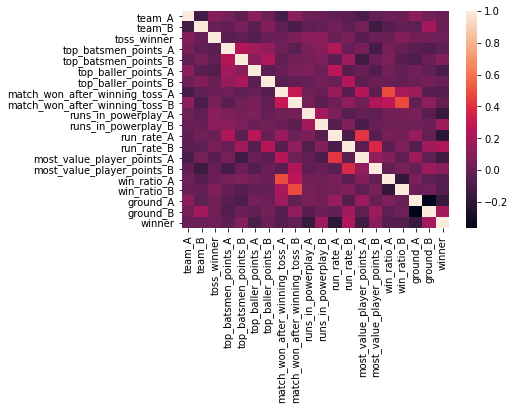

In [43]:
corr = df2.corr()
sns.heatmap(corr)

In [44]:
x=df2[["team_A", "team_B", "toss_winner", "top_batsmen_points_A", "top_batsmen_points_B", "top_baller_points_A",
        "top_baller_points_B", "match_won_after_winning_toss_A", "match_won_after_winning_toss_B",
       "runs_in_powerplay_A", "runs_in_powerplay_B", "run_rate_A", "run_rate_B",
        "most_value_player_points_A","most_value_player_points_B", "win_ratio_A", "win_ratio_B",
        "ground_A","ground_B"]]
y=df2["winner"]

In [45]:
# seed = 7
test_size = 0.1
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size)

In [46]:
model = XGBClassifier()
model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [47]:
print(model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [48]:
# make predictions for test data
y_pred = model.predict(x_test)

In [49]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[19, 10],
       [12, 35]], dtype=int64)

In [50]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7105263157894737
